In [75]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
datasets = load_dataset("lukebarousse/data_jobs")
df = datasets['train'].to_pandas()
df['job_posted_date']  = pd.to_datetime(df['job_posted_date'])

<Axes: xlabel='job_posted_month'>

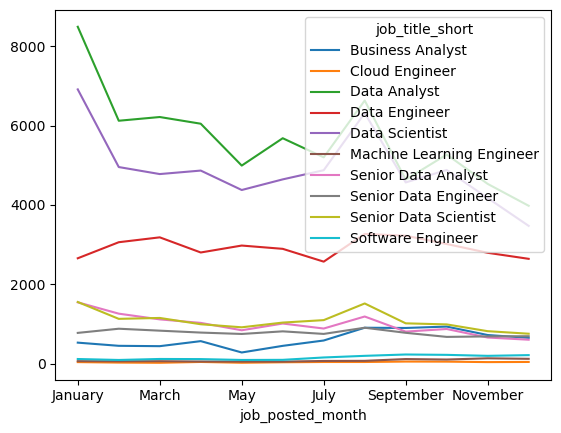

In [76]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')
df_US_pivot.plot(kind='line')


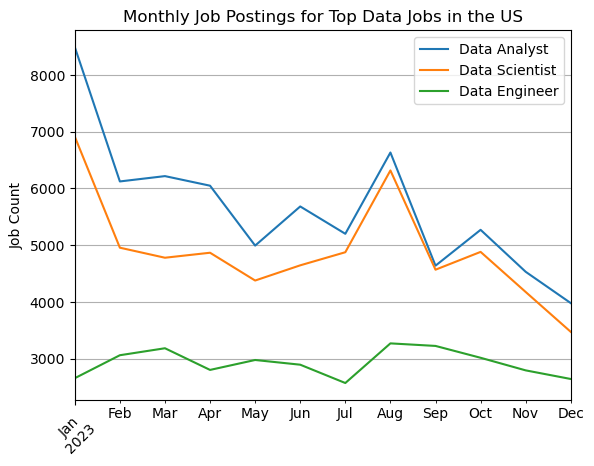

In [81]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Job Count')
plt.legend()
plt.grid(True)
plt.show()

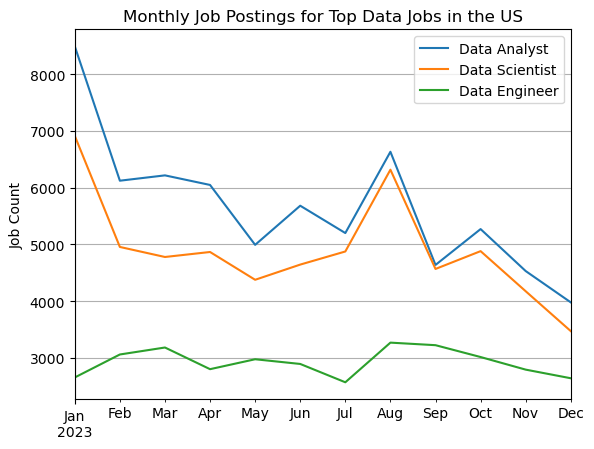

In [80]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.to_period('M')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('')
plt.ylabel('Job Count')
plt.legend()
plt.grid(True)
plt.show()

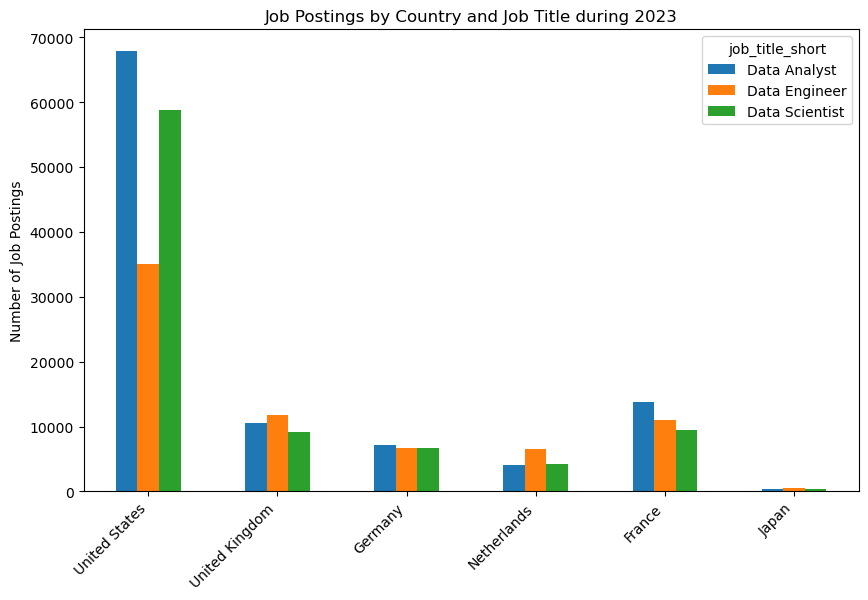

In [84]:
# Define the specific countries
top_countries = ['United States', 'United Kingdom', 'Germany', 'Netherlands', 'France', 'Japan']

# Pivot table to calculate the number of job postings by country and job title
df_job_country_salary = df.pivot_table(index='job_country', columns='job_title_short', aggfunc='size', fill_value=0)

# Select only the rows for the top countries
df_job_country_salary = df_job_country_salary.loc[top_countries]

# Specify the job titles to include
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_job_country_salary = df_job_country_salary[job_titles]

# Plot the results
df_job_country_salary.plot(kind='bar', figsize=(10, 6))

plt.ylabel('Number of Job Postings')
plt.xlabel('')
plt.title('Job Postings by Country and Job Title during 2023')
plt.xticks(rotation=45, ha='right')
plt.show()